___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_m = pd.read_csv('MALE.csv', encoding='latin-1' )
df_m

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [3]:
df_f = pd.read_csv('FEMALE.csv', encoding='latin-1' )
df_f.rename(columns={'SubjectId': 'subjectid'}, inplace=True)
df_f

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [4]:
df_f.rename(columns={"SubjectId":"subjectid"}, inplace=True)

In [5]:
df = pd.concat([df_m, df_f], axis=0).reset_index(drop=True)
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [6]:
df.shape

(6068, 108)

In [7]:
df.isnull().sum().sum()

4647

In [8]:
for features in df.columns:
    if df[features].dtype == 'object':
        print(df[features].value_counts(), 'sep=\n')

Male      4082
Female    1986
Name: Gender, dtype: int64 sep=

27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
6-Mar-12     41
2-Jun-11     41
26-May-11    40
3-Apr-12     40
26-Mar-12    40
23-Feb-12    39
13-Mar-12    39
29-Feb-12    39
15-Mar-11    39
27-Apr-11    39
30-Mar-11    39
1-Mar-12     38
8-Dec-10     38
20-Mar-12    37
28-May-11    37
24-Jan-12    36
21-Mar-12    36
7-Mar-12     36
11-Apr-11    36
2-Mar-12     36
21-Mar-11    36
25-Jan-12    35
18-Mar-11    35
16-Mar-12    34
24-Feb-12    34
28-Jan-12    33
27-May-11    33
25-Mar-11    33
30-Jan-11    33
15-Aug-11    33
25-Mar-12    33
8-Jun-11     33
26-Mar-11    32
16-Aug-11    32
8-Mar-12     32
7-Jun-11     32
19-Mar-12    32
27-Jan-12    31
8-Dec-11     31
19-Jan-12    31
31-Mar-11    31
7-Nov-11     31
17-Mar-11    31
20-Jan-11    31
12-Dec-11    31
5-Oct-11     30
31-Jan-12    30
3-Jun-11     30
2-Feb-12     30
23-Nov-10    30
7-Dec-11     30
24-Mar-12    30
7-Jul-11     30
14-Mar-11

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [10]:
for i in df.columns:
    print(i, '--------', df[i].isnull().sum() )

subjectid -------- 0
abdominalextensiondepthsitting -------- 0
acromialheight -------- 0
acromionradialelength -------- 0
anklecircumference -------- 0
axillaheight -------- 0
balloffootcircumference -------- 0
balloffootlength -------- 0
biacromialbreadth -------- 0
bicepscircumferenceflexed -------- 0
bicristalbreadth -------- 0
bideltoidbreadth -------- 0
bimalleolarbreadth -------- 0
bitragionchinarc -------- 0
bitragionsubmandibulararc -------- 0
bizygomaticbreadth -------- 0
buttockcircumference -------- 0
buttockdepth -------- 0
buttockheight -------- 0
buttockkneelength -------- 0
buttockpopliteallength -------- 0
calfcircumference -------- 0
cervicaleheight -------- 0
chestbreadth -------- 0
chestcircumference -------- 0
chestdepth -------- 0
chestheight -------- 0
crotchheight -------- 0
crotchlengthomphalion -------- 0
crotchlengthposterioromphalion -------- 0
earbreadth -------- 0
earlength -------- 0
earprotrusion -------- 0
elbowrestheight -------- 0
eyeheightsitting ----

In [11]:
df.duplicated().sum()

0

In [12]:
df.DODRace.value_counts()

# This will be my target feature. But i feel some problem of it being unbalanced. So at first step i will use the feature
# as it is but later i should see the scores by pruning its last three values (5, 6 and 8)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

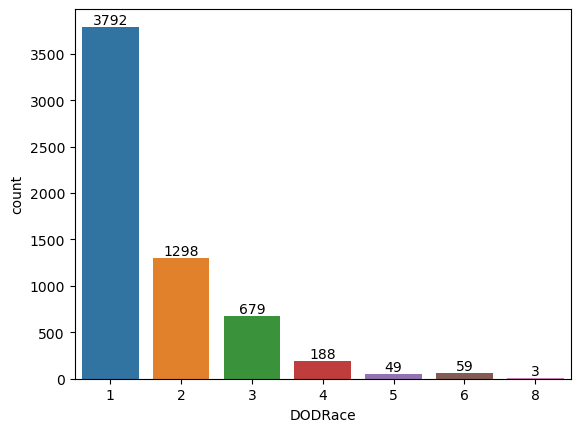

In [13]:
ax = sns.countplot(data = df, x ='DODRace')
ax.bar_label(ax.containers[0]);

In [14]:
cat_feat = []
for features in df.columns:
    if df[features].dtype == 'object':
        cat_feat.append(features)
        
cat_feat

['Gender',
 'Date',
 'Installation',
 'Component',
 'Branch',
 'PrimaryMOS',
 'SubjectsBirthLocation',
 'Ethnicity',
 'WritingPreference']

In [15]:
df.drop('Ethnicity', axis=1, inplace=True)
df.shape



(6068, 107)

In [16]:
df.isnull().sum().sum()

0

In [17]:
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [18]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [19]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace
Army National Guard  Combat Arms             1          0.771995
                                             2          0.097893
                                             3          0.091698
                                             4          0.022305
                                             5          0.011152
                                             6          0.004957
                     Combat Service Support  1          0.643509
                                             2          0.218947
                                             3          0.099649
                                             4          0.023158
                                             6          0.007719
                                             5          0.007018
                     Combat Support          1          0.661765
                                             2          0.226891
                                     

In [20]:
df.drop(['subjectid', 'Installation','Component','PrimaryMOS', 'Branch', 'SubjectNumericRace', 'Heightin', 'Weightlbs', 'Date'], 
        axis = 1, inplace=True)



In [21]:
df.shape

(6068, 98)

In [22]:
df.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
abdominalextensiondepthsitting,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,0.506497,0.724471,0.371894,0.529000,0.621899,0.496898,0.741188,0.841581,0.258496,0.483275,0.333003,0.657287,0.346116,0.631068,0.826382,0.780450,0.304562,0.203336,0.466971,0.209593,0.247567,0.402031,0.132538,0.256314,0.282460,0.440374,0.354184,0.356183,0.629757,0.728564,0.317555,0.423842,0.426221,0.462871,0.311137,0.341047,0.370753,0.342171,0.509410,0.439029,0.597205,0.557642,0.268208,0.256375,0.603114,0.546482,0.288285,0.359487,0.235804,0.353888,0.673955,0.297767,0.658587,0.629364,0.329005,0.322198,0.163311,0.291144,0.639949,0.296521,0.192526,0.276912,0.429903,0.286739,0.327873,0.316876,0.361806,0.304103,0.732133,0.725401,0.396786,0.275044,0.183890,0.243939,0.729533,0.572025,0.859924,0.939899,0.958932,0.579296,0.162457,0.825714,0.550544,0.389220,-0.079167,0.380614
acromialheight,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,0.633088,0.705621,0.569411,0.581562,0.478282,0.302339,0.355987,0.870776,0.817915,0.755708,0.413845,0.984230,0.549632,0.538292,0.293602,0.960106,0.901554,0.353748,0.421327,0.365927,0.434054,0.268885,0.282664,0.813120,0.667315,0.830812,0.849715,0.640346,0.578186,0.866286,0.895280,0.711809,0.719060,0.758197,0.380922,0.442553,0.560746,0.800841,0.449487,0.227349,0.122086,0.934169,0.335677,0.531856,0.595748,0.899017,0.933643,0.860708,0.683209,0.337429,0.543181,0.630618,0.655042,0.869301,0.716936,0.895714,0.825665,0.693430,0.892212,0.543200,0.820647,0.874753,0.882861,0.886437,0.980269,0.985013,0.946931,0.294388,0.456801,0.807075,0.893164,0.319107,0.886774,0.739371,0.729273,0.446707,0.413142,0.371948,0.604967,0.933248,0.684610,0.734622,0.922687,-0.235121,0.078582
acromionradialelength,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,0.351546,0.566667,0.616990,0.518240,0.512804,0.425242,0.265856,0.306551,0.821045,0.783783,0.745158,0.357724,0.869814,0.475403,0.479231,0.278684,0.846182,0.855699,0.259435,0.320495,0.319147,0.365616,0.227197,-0.010985,0.641928,0.584220,0.756442,0.822701,0.563453,0.508698,0.841266,0.824941,0.630305,0.637453,0.725897,0.327257,0.400689,0.499182,0.715297,0.440114,0.200773,0.104683,0.863237,0.335555,0.476203,0.545767,0.836715,0.865876,0.817809,0.563735,0.292856,0.480474,0.5512

In [23]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [24]:
df2= df

In [25]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [26]:
X = df.drop(columns=['DODRace'])
y = df.DODRace

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 101)

In [29]:
cat = ['Gender', 'WritingPreference', 'SubjectsBirthLocation']
cat

['Gender', 'WritingPreference', 'SubjectsBirthLocation']

In [30]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder = 'passthrough')

In [31]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]

In [32]:
pipe_model = Pipeline(steps=operations)

In [33]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('column_transfer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=101))])

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [35]:
def eval_metric(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print()
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print()
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [36]:
df.DODRace.value_counts()



1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [37]:
eval_metric(pipe_model)

Test_Set

[[715  11  22   7   3   1   0]
 [ 23 232   3   0   1   0   1]
 [ 53  11  67   4   1   0   0]
 [  8   0   2  21   0   6   0]
 [  7   0   2   1   0   0   0]
 [  3   1   1   2   0   5   0]
 [  0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.88      0.94      0.91       759
           2       0.91      0.89      0.90       260
           3       0.69      0.49      0.58       136
           4       0.60      0.57      0.58        37
           5       0.00      0.00      0.00        10
           6       0.42      0.42      0.42        12
           8       0.00      0.00      0.00         0

    accuracy                           0.86      1214
   macro avg       0.50      0.47      0.48      1214
weighted avg       0.85      0.86      0.85      1214


Train_Set

[[2939   19   68    3    2    2    0]
 [  42  985    9    1    0    1    0]
 [ 167   16  355    3    2    0    0]
 [  27    4    8  110    0    2    0]
 [  27    5

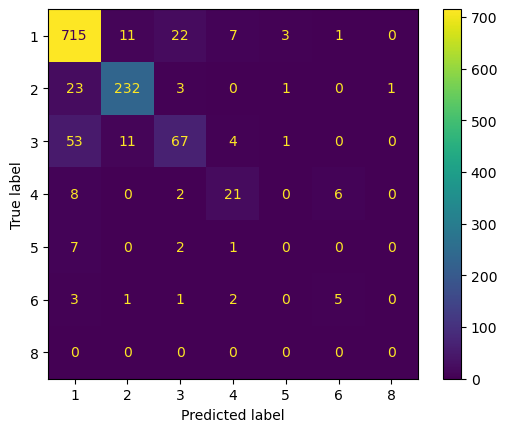

In [38]:
plot_confusion_matrix(pipe_model,X_test,y_test);

In [39]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [40]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:,2:].mean()
df_scores

test_accuracy     0.868568
train_accuracy    0.914137
dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [42]:
# DODRace featurında sample sayısı görece düşük olan üç kategoriyi atıp bütün işlemleri tekrar ederek skorlara bakıyoruz

df2 = df[df.DODRace <4].reset_index(drop=True)
X= df2.drop(columns=['DODRace'])
y = df2.DODRace

In [43]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 101)

In [45]:
cat = ['Gender', 'WritingPreference', 'SubjectsBirthLocation']
cat

['Gender', 'WritingPreference', 'SubjectsBirthLocation']

In [46]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder = 'passthrough')

In [47]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]

In [48]:
pipe_model2 = Pipeline(steps=operations)

In [49]:
pipe_model2.fit(X_train, y_train)

Pipeline(steps=[('column_transfer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=101))])

In [50]:
eval_metric(pipe_model2)

Test_Set

[[722  13  23]
 [ 22 235   3]
 [ 57  10  69]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.93       758
           2       0.91      0.90      0.91       260
           3       0.73      0.51      0.60       136

    accuracy                           0.89      1154
   macro avg       0.85      0.79      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set

[[2943   22   69]
 [  41  987   10]
 [ 172   19  352]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3034
           2       0.96      0.95      0.96      1038
           3       0.82      0.65      0.72       543

    accuracy                           0.93      4615
   macro avg       0.90      0.86      0.88      4615
weighted avg       0.93      0.93      0.93      4615



In [51]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:,2:].mean()
df_scores



test_accuracy     0.902497
train_accuracy    0.929120
dtype: float64

### 1 classı için cross validation

In [52]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_class1 = make_scorer(f1_score, average = None, labels =[1])
precision_class1 = make_scorer(precision_score, average = None, labels =[1])
recall_class1 = make_scorer(recall_score, average = None, labels =[1])


scoring = {"f1_class1":f1_class1, 
           "precision_class1":precision_class1,
           "recall_class1":recall_class1}

In [53]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_f1_class1            0.936436
train_f1_class1           0.951500
test_precision_class1     0.917046
train_precision_class1    0.933756
test_recall_class1        0.956830
train_recall_class1       0.969933
dtype: float64

3 classı için cross validation

In [54]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_class3 = make_scorer(f1_score, average = None, labels =[3])
precision_class3 = make_scorer(precision_score, average = None, labels =[3])
recall_class3 = make_scorer(recall_score, average = None, labels =[3])


scoring = {"f1_class3":f1_class3, 
           "precision_class3":precision_class3,
           "recall_class3":recall_class3}

In [55]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_class3            0.647977
train_f1_class3           0.730656
test_precision_class3     0.737879
train_precision_class3    0.820335
test_recall_class3        0.580101
train_recall_class3       0.658689
dtype: float64

### Classlar için probabilityler

In [56]:
y_pred=pipe_model2.predict(X_test)
y_pred_proba = pipe_model2.predict_proba(X_test)
y_pred_proba

array([[3.32739236e-04, 9.99667185e-01, 7.54676020e-08],
       [9.98032581e-01, 7.32088597e-05, 1.89421035e-03],
       [9.58729915e-01, 2.62188396e-02, 1.50512453e-02],
       ...,
       [9.18898759e-01, 9.27497505e-04, 8.01737431e-02],
       [1.90806264e-04, 9.99804869e-01, 4.32445628e-06],
       [9.99684363e-01, 3.68466093e-05, 2.78790182e-04]])

In [57]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_class1"] = y_pred_proba[:,0]
test_data["pred_proba_class2"] = y_pred_proba[:,1]
test_data["pred_proba_class3"] = y_pred_proba[:,2]
test_data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference,DODRace,pred,pred_proba_class1,pred_proba_class2,pred_proba_class3
2762,374,1574,355,256,1469,273,213,444,428,305,568,83,343,317,146,1214,308,1033,730,590,470,1657,312,1201,290,1452,971,718,397,34,60,23,274,846,110,287,376,371,655,527,1272,91,224,215,154,601,207,388,77,387,450,1198,710,456,486,561,632,552,84,517,126,422,463,1485,129,480,291,1334,380,157,979,974,638,2001,1919,1578,1264,777,213,843,532,143,1055,1854,512,386,1192,346,414,1148,1312,194,948,Male,South Carolina,32,Left hand,2,2,0.000333,0.999667,7.546760e-08
4283,242,1373,312,253,1286,244,176,374,324,281,453,72,315,310,136,1076,234,846,614,494,415,1438,263,960,253,1217,797,647,377,32,59,23,234,787,94,238,321,281,504,451,1070,81,193,183,146,557,194,328,71,376,420,1051,560,359,395,456,538,469,70,457,124,321,366,1349,108,403,245,1060,333,147,896,818,542,1680,1698,1384,1107,651,190,684,454,121,896,1626,433,322,919,230,368,1017,761,167,825,Female,Minnesota,23,Right hand,1,1,0.998033,0.000073,1.894210e-03
1224,252,1427,333,222,1311,253,199,415,342,276,492,70,333,329,137,925,215,878,603,492,383,1486,289,987,235,1240,837,518,311,37,64,29,218,791,104,266,360,297,551,489,1105,90,218,197,156,578,199,348,69,326,353,1055,665,407,448,489,560,498,67,388,128,373,426,1436,121,434,270,1141,363,151,899,912,582,1835,1740,1421,1085,537,148,821,479,134,900,1627,483,305,909,246,407,1016,752,179,827,Male,Indiana,58,Right hand,1,1,0.958730,0.026219,1.505125e-02
4238,293,1396,323,220,1300,242,190,374,350,306,486,65,337,325,141,1082,299,887,616,500,355,1439,300,1098,279,1204,832,555,312,36,59,20,211,753,100,259,349,292,568,480,1107,82,194,187,149,614,210,324,76,346,424,1049,620,398,410,485,541,492,70,390,123,362,389,1397,119,412,283,1116,345,144,859,850,600,1792,1677,1382,1131,689,187,817,471,138,881,1642,473,343,1049,285,424,973,827,161,797,Female,New York,22,Right hand,2,2,0.000311,0.978832,2.085691e-02
4230,248,1271,297,225,1197,229,183,359,282,285,448,70,328,293,135,1064,276,824,586,475,393,1334,250,900,233,1110,758,621,311,35,54,19,220,720,94,255,304,254,467,427,1061,76,184,178,143,558,189,327,70,364,419,963,605,380,408,424,504,435,61,416,115,347,366,1282,106,366,240,1007,323,137,824,775,533,1586,1548,1273,1041,647,187,712,422,115,824,1527,439,304,875,229,309,939,681,154,742,Female,South Carolina,47,Right hand,2,2,0.0

### Logistic Model GridsearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, return_train_score=True)



In [59]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transfer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])])),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=101))]),
             param_grid={'logistic__C': [0.01, 0.1

In [60]:
grid_model.best_params_

{'logistic__C': 0.1, 'logistic__penalty': 'l2'}

In [61]:
grid_model.best_score_

0.9027085590465873

In [62]:
y_pred = grid_model.predict(X_test)
y_pred

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [63]:
eval_metric(grid_model)

Test_Set

[[731  12  15]
 [ 22 235   3]
 [ 56  10  70]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93       758
           2       0.91      0.90      0.91       260
           3       0.80      0.51      0.62       136

    accuracy                           0.90      1154
   macro avg       0.87      0.79      0.82      1154
weighted avg       0.89      0.90      0.89      1154


Train_Set

[[2953   20   61]
 [  52  975   11]
 [ 182   20  341]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3034
           2       0.96      0.94      0.95      1038
           3       0.83      0.63      0.71       543

    accuracy                           0.93      4615
   macro avg       0.90      0.85      0.87      4615
weighted avg       0.92      0.93      0.92      4615



In [64]:
eval_metric(pipe_model2)

Test_Set

[[722  13  23]
 [ 22 235   3]
 [ 57  10  69]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.93       758
           2       0.91      0.90      0.91       260
           3       0.73      0.51      0.60       136

    accuracy                           0.89      1154
   macro avg       0.85      0.79      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set

[[2943   22   69]
 [  41  987   10]
 [ 172   19  352]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3034
           2       0.96      0.95      0.96      1038
           3       0.82      0.65      0.72       543

    accuracy                           0.93      4615
   macro avg       0.90      0.86      0.88      4615
weighted avg       0.93      0.93      0.93      4615



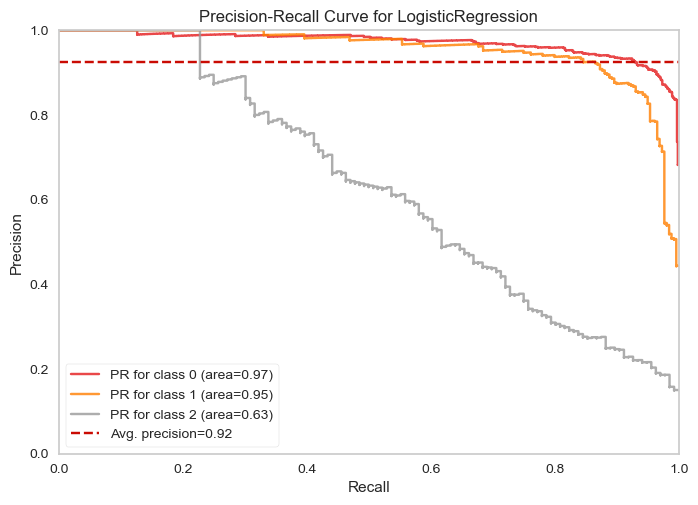

In [65]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["0", "1", "2"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### Precision Recall Curve

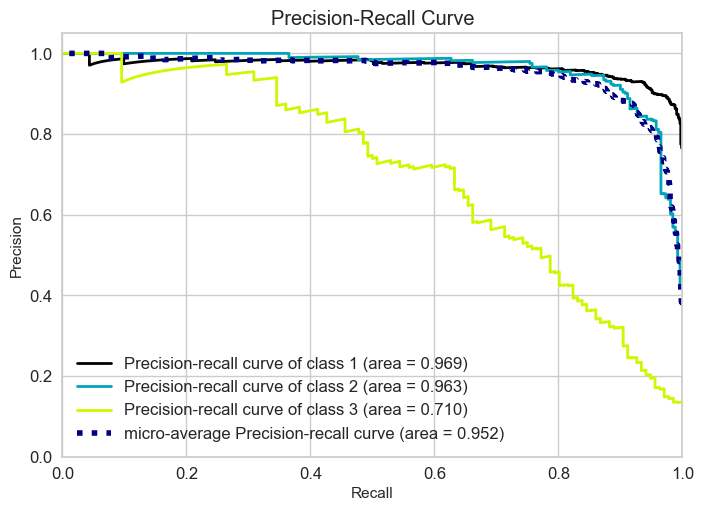

In [66]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model 

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC


In [68]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [69]:
scaler = MinMaxScaler()
modelSVM =  SVC(kernel="rbf")

In [70]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder = 'passthrough')

In [71]:
operations = [('column_transfer', column_trans), ('scaler', scaler), ('SVM', modelSVM)]

In [72]:
pipe_model_SVM = Pipeline(steps = operations)

In [73]:
pipe_model_SVM.fit(X_train, y_train)

Pipeline(steps=[('column_transfer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('scaler', MinMaxScaler()), ('SVM', SVC())])

In [74]:
y_pred_test = pipe_model_SVM.predict(X_test)
y_pred_train = pipe_model_SVM.predict(X_train)

In [75]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.8717504332755632,
 0.8899241603466955,
 0.7207567752121999,
 0.7753687939040783)

In [76]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[748   7   3]
 [ 31 229   0]
 [ 94  13  29]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[3014   13    7]
 [ 117  919    2]
 [ 342   27  174]]
TEST REPORT 
               precision    recall  f1-score   support

           1      0.857     0.987     0.917       758
           2      0.920     0.881     0.900       260
           3      0.906     0.213     0.345       136

    accuracy                          0.872      1154
   macro avg      0.894     0.694     0.721      1154
weighted avg      0.877     0.872     0.846      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           1      0.868     0.993     0.926      3034
           2      0.958     0.885     0.920      1038
           3      0.951     0.320     0.479       543

    accuracy                          0.890      4615
   macro avg      0.926     0.733     0.775      4615
weighted avg      0.8

###  SVC Model GridsearchCV

In [77]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [78]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [79]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
  

In [80]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('svc',
                 SVC(C=1, class_weight='balanced', gamma='auto',
                     random_state=101))])

In [81]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'auto'}

In [82]:
svm_model_grid.best_index_

4

In [83]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.600235
mean_train_score    0.603371
Name: 3, dtype: object

In [84]:
svm_model_grid.best_score_

0.6574222234742843

In [85]:
eval_metric(svm_model_grid)

Test_Set

[[758   0   0]
 [260   0   0]
 [136   0   0]]
              precision    recall  f1-score   support

           1       0.66      1.00      0.79       758
           2       0.00      0.00      0.00       260
           3       0.00      0.00      0.00       136

    accuracy                           0.66      1154
   macro avg       0.22      0.33      0.26      1154
weighted avg       0.43      0.66      0.52      1154


Train_Set

[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



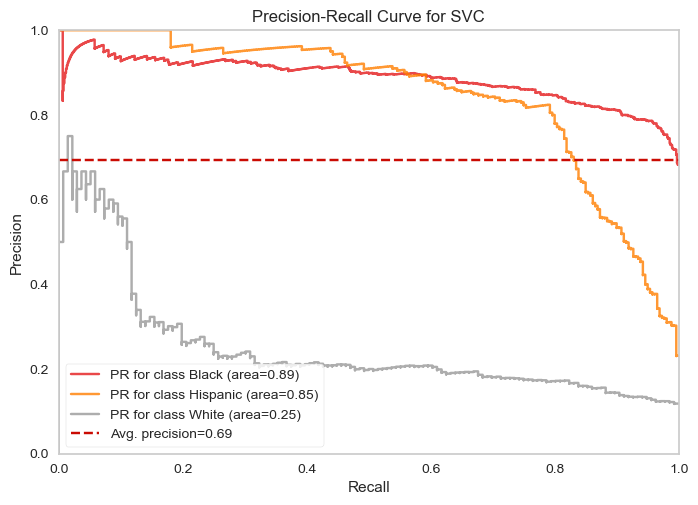

In [86]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

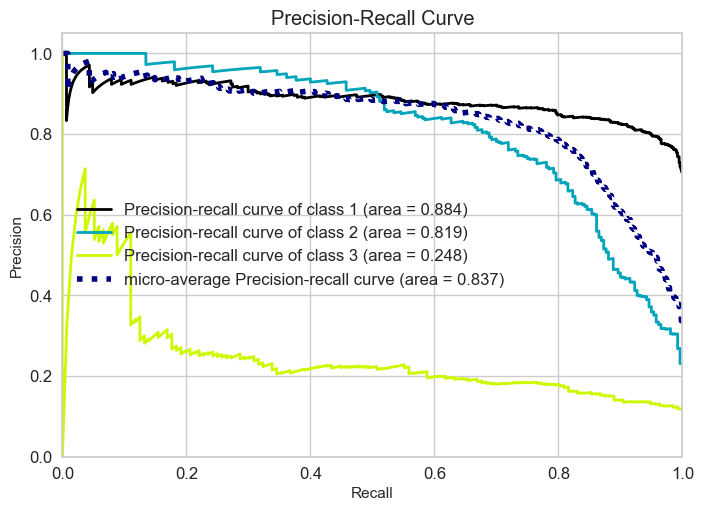

In [87]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101, probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

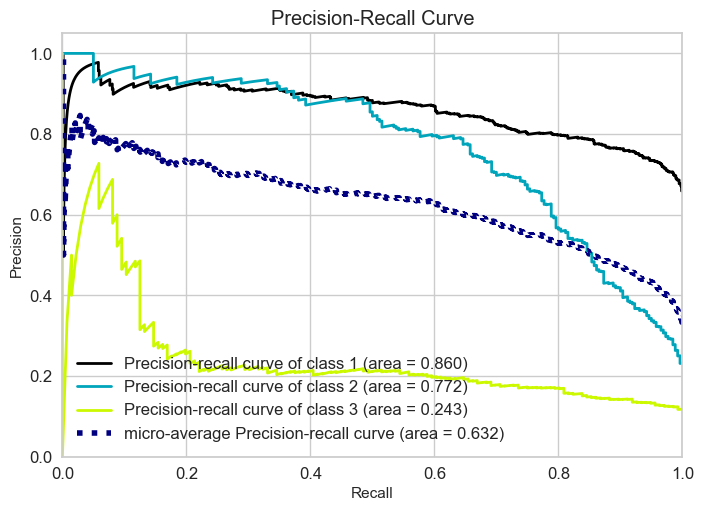

In [88]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [89]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_
svc_f1 = f1_score(y_test, y_pred, average=None)
svc_recall = recall_score(y_test, y_pred, average=None)

## 3. RF

### Vanilla RF Model

In [90]:
cat

['Gender', 'WritingPreference', 'SubjectsBirthLocation']

In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [93]:
eval_metric(pipe_model_rf)

Test_Set

[[751   7   0]
 [ 75 184   1]
 [122  12   2]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.88       758
           2       0.91      0.71      0.79       260
           3       0.67      0.01      0.03       136

    accuracy                           0.81      1154
   macro avg       0.79      0.57      0.57      1154
weighted avg       0.80      0.81      0.76      1154


Train_Set

[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [94]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()

fit_time                 2.526404
score_time               0.063796
test_accuracy            0.797183
train_accuracy           1.000000
test_precision_micro     0.797183
train_precision_micro    1.000000
test_recall_micro        0.797183
train_recall_micro       1.000000
test_f1_micro            0.797183
train_f1_micro           1.000000
dtype: float64

In [95]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_class3            0.046154
train_f1_class3           1.000000
test_precision_class3     0.733333
train_precision_class3    1.000000
test_recall_class3        0.023938
train_recall_class3       1.000000
dtype: float64

### RF Model GridsearchCV

In [96]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]

In [97]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             n_jobs=-1,
                             return_train_score=True)

In [98]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
     

In [99]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [100]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [101]:
rf_grid_model.best_index_

2

In [102]:
pd.DataFrame(rf_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.573781
mean_train_score    0.589545
Name: 0, dtype: object

In [103]:
rf_grid_model.best_score_

0.5950162513542796

In [104]:
eval_metric(rf_grid_model)

Test_Set

[[398  82 278]
 [ 29 195  36]
 [ 32  21  83]]
              precision    recall  f1-score   support

           1       0.87      0.53      0.65       758
           2       0.65      0.75      0.70       260
           3       0.21      0.61      0.31       136

    accuracy                           0.59      1154
   macro avg       0.58      0.63      0.55      1154
weighted avg       0.74      0.59      0.62      1154


Train_Set

[[1651  281 1102]
 [  74  816  148]
 [ 134   40  369]]
              precision    recall  f1-score   support

           1       0.89      0.54      0.67      3034
           2       0.72      0.79      0.75      1038
           3       0.23      0.68      0.34       543

    accuracy                           0.61      4615
   macro avg       0.61      0.67      0.59      4615
weighted avg       0.77      0.61      0.65      4615



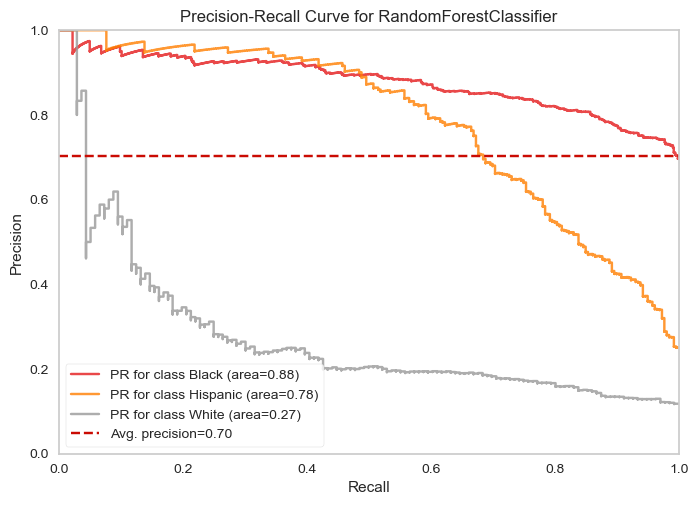

In [105]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [106]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

[18:02:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
       

In [107]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [108]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index = y_train.index)

comp["label"] = y_train
comp.head()

,weights,label
397,2.833026,3
3261,2.833026,3
5285,0.507031,1
2080,2.833026,3
4065,1.482017,2


In [109]:
comp.groupby("label")["weights"].value_counts()

label  weights 
1      0.507031    3034
2      1.482017    1038
3      2.833026     543
Name: weights, dtype: int64

In [110]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

[18:02:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
       

In [111]:
eval_metric(pipe_model_xgb)

Test_Set

[[715  16  27]
 [ 24 231   5]
 [ 76  13  47]]
              precision    recall  f1-score   support

           1       0.88      0.94      0.91       758
           2       0.89      0.89      0.89       260
           3       0.59      0.35      0.44       136

    accuracy                           0.86      1154
   macro avg       0.79      0.73      0.74      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set

[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [112]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[18:02:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

test_f1_class3            0.568027
train_f1_class3           1.000000
test_precision_class3     0.739584
train_precision_class3    1.000000
test_recall_class3        0.462249
train_recall_class3       1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [113]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [114]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [115]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

[18:05:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                           

In [116]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=...
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
              

In [117]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [118]:
xgb_grid_model.best_index_

30

In [119]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.632503
mean_train_score    0.654713
Name: 12, dtype: object

In [120]:
xgb_grid_model.best_score_

0.6780065005417117

In [121]:
eval_metric(xgb_grid_model)

Test_Set

[[504  80 174]
 [ 20 200  40]
 [ 40  25  71]]
              precision    recall  f1-score   support

           1       0.89      0.66      0.76       758
           2       0.66      0.77      0.71       260
           3       0.25      0.52      0.34       136

    accuracy                           0.67      1154
   macro avg       0.60      0.65      0.60      1154
weighted avg       0.76      0.67      0.70      1154


Train_Set

[[2065  318  651]
 [  90  816  132]
 [ 120   63  360]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78      3034
           2       0.68      0.79      0.73      1038
           3       0.31      0.66      0.43       543

    accuracy                           0.70      4615
   macro avg       0.63      0.71      0.65      4615
weighted avg       0.79      0.70      0.73      4615



[18:05:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


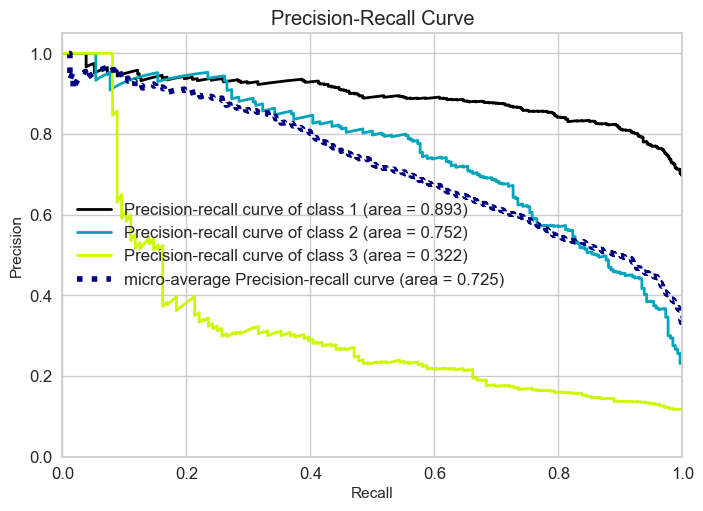

In [122]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                            max_depth=2, n_estimators=20, objective='multi:softprob', random_state=101,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [123]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7522232393442416

In [124]:
y_test_dummies

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [125]:
y_pred_proba

array([[0.34028175, 0.4347189 , 0.22499934],
       [0.36903247, 0.26985168, 0.36111584],
       [0.3180665 , 0.32943478, 0.35249868],
       ...,
       [0.24510632, 0.3669254 , 0.38796827],
       [0.24829075, 0.4175326 , 0.33417663],
       [0.31553793, 0.29826927, 0.38619277]], dtype=float32)

In [126]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None)
xgb_recall = recall_score(y_test, y_pred, average=None)

COMPARE

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [128]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [129]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [130]:
X_train_ohe = column_trans.fit_transform(X_train)

In [131]:

X_r, y_r = SMOTE(k_neighbors=2).fit_resample(X_train_ohe, y_train)

In [132]:
X_r.shape

(9102, 225)

In [133]:
y_r.value_counts()

3    3034
1    3034
2    3034
Name: DODRace, dtype: int64

In [134]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [135]:
X_under.shape

(1629, 225)

In [136]:
y_under.value_counts()

1    543
2    543
3    543
Name: DODRace, dtype: int64

In [137]:
over = SMOTE(sampling_strategy={3: 1000})
under = RandomUnderSampler(sampling_strategy={1: 2500})

In [138]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [139]:
y_train.value_counts()

1    3034
2    1038
3     543
Name: DODRace, dtype: int64

In [140]:
y_resampled_over.value_counts()

1    3034
2    1038
3    1000
Name: DODRace, dtype: int64

In [141]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [142]:
y_resampled_under.value_counts()

1    2500
2    1038
3     543
Name: DODRace, dtype: int64

## SVC Over/Under Sampling

In [143]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [144]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [145]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
             ("svc", SVC(C=1, random_state=101))]

In [146]:
smote_pipeline = Pipeline(steps=operations)

In [147]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('o', SMOTE(sampling_strategy={3: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={1: 2500})),
                ('svc', SVC(C=1, random_state=101))])

In [148]:
eval_metric(smote_pipeline)

Test_Set

[[714   6  38]
 [ 26 229   5]
 [ 57   8  71]]
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       758
           2       0.94      0.88      0.91       260
           3       0.62      0.52      0.57       136

    accuracy                           0.88      1154
   macro avg       0.82      0.78      0.80      1154
weighted avg       0.87      0.88      0.88      1154


Train_Set

[[2904   16  114]
 [  95  916   27]
 [ 179   21  343]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.93      3034
           2       0.96      0.88      0.92      1038
           3       0.71      0.63      0.67       543

    accuracy                           0.90      4615
   macro avg       0.86      0.82      0.84      4615
weighted avg       0.90      0.90      0.90      4615



In [149]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_class3            0.626889
train_f1_class3           0.677113
test_precision_class3     0.673988
train_precision_class3    0.717945
test_recall_class3        0.587374
train_recall_class3       0.640886
dtype: float64

## Xgboost Over/ Under Sampling

In [150]:
operations_xgb = [("OrdinalEncoder", column_trans), ('o', over), ('u', under), ("XGB_model", XGBClassifier(random_state=101))]

smote_pipeline_xgb = Pipeline(steps=operations_xgb)

smote_pipeline_xgb.fit(X_train, y_train)

[18:07:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('o', SMOTE(sampling_strategy={3: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={1: 2500})),
                ('XGB_model',
                 XGBClassifier(base_score=...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monot

In [151]:
eval_metric(smote_pipeline_xgb)

Test_Set

[[725  10  23]
 [ 25 231   4]
 [ 68  13  55]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       758
           2       0.91      0.89      0.90       260
           3       0.67      0.40      0.50       136

    accuracy                           0.88      1154
   macro avg       0.82      0.75      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set

[[3007   13   14]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      3034
           2       0.99      1.00      0.99      1038
           3       0.97      1.00      0.99       543

    accuracy                           0.99      4615
   macro avg       0.99      1.00      0.99      4615
weighted avg       0.99      0.99      0.99      4615



- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
#!pip install shap

In [153]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder = 'passthrough')

In [154]:
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [155]:
cat

['Gender', 'WritingPreference', 'SubjectsBirthLocation']

In [156]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_class3            0.469382
train_f1_class3           0.524640
test_precision_class3     0.362628
train_precision_class3    0.405212
test_recall_class3        0.666718
train_recall_class3       0.744018
dtype: float64

In [157]:
X2 = X
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,21,Right hand


In [158]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [159]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [160]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=101, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [161]:
eval_metric(pipe_shap_model)

Test_Set

[[652  18  88]
 [  9 237  14]
 [ 23   8 105]]
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       758
           2       0.90      0.91      0.91       260
           3       0.51      0.77      0.61       136

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set

[[2629   67  338]
 [  27  976   35]
 [  70   16  457]]
              precision    recall  f1-score   support

           1       0.96      0.87      0.91      3034
           2       0.92      0.94      0.93      1038
           3       0.55      0.84      0.67       543

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [162]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_class3            0.594748
train_f1_class3           0.666087
test_precision_class3     0.492289
train_precision_class3    0.549217
test_recall_class3        0.753262
train_recall_class3       0.846226
dtype: float64

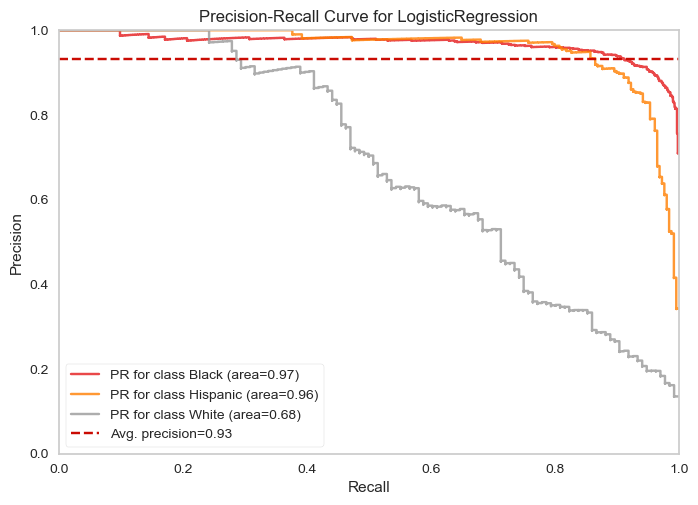

In [163]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [168]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [169]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [170]:
eval_metric(final_model)

Test_Set

[[660  15  83]
 [  9 243   8]
 [ 20   6 110]]
              precision    recall  f1-score   support

           1       0.96      0.87      0.91       758
           2       0.92      0.93      0.93       260
           3       0.55      0.81      0.65       136

    accuracy                           0.88      1154
   macro avg       0.81      0.87      0.83      1154
weighted avg       0.90      0.88      0.89      1154


Train_Set

[[2607   61  366]
 [  27  972   39]
 [  64   19  460]]
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      3034
           2       0.92      0.94      0.93      1038
           3       0.53      0.85      0.65       543

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [171]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.4436566328815078

In [172]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.4647217293276294

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___